# User-defined distribution Sampler

This notebook required python 3.10+ to work. Please read readme.md to set up the environment correctly.

Let's say we want to create a sampler from a custom distribution (and not necessarily normalized).
For example function :
$f(x) := \left|\frac{sin(x)}{x}\right|\sqrt{x}$

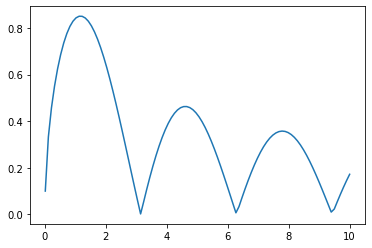

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0.01, 10, num=100)

def function(x):
    return abs(np.sin(x)/x)*np.sqrt(x)

_ = plt.plot(t, function(t))

Here is our general-purpose class that enable us to define custom distribution and sample from it.

In [2]:
from typing import Callable

import numpy as np
import seaborn as sns

from scipy import integrate
from scipy.stats import rv_continuous


class CustomDistribution(rv_continuous):
    """User-defined distribution sampler
    
    Parameters
    ----------
    func: Callable
        Analytical definition of probability density function(pdf)
        Not required to be normalized
    
    interval: tuple(float, float)
        Interval of pdf definition
    
    Example
    -------
        custom_sinc = CustomDistribution(lambda x:abs(np.sin(x)/x)*np.sqrt(x), interval=(0, 10))
        custom_sinc.plot()
    """
    
    def __init__(self, func: Callable, interval:tuple[float, float]):
        super().__init__(func, *interval)
        self.func = func
        self.func_norm : float = integrate.quad(func, *interval)[0]
    
    def _pdf(self, x) -> float:
        """Return one point of normalized user-defined pdf"""
        return self.func(x)/self.func_norm
    
    def sample(self, n_samples) -> np.ndarray | float:
        """Sample points from user-defined normalized pdf"""
        return self.rvs(size=n_samples, random_state=69)
    
    def plot(self, n_bins=50, n_samples=200) -> None:
        """Plot sampled user-defined distribution with kernel density estimate"""
        hist_sampled = self.sample(n_samples)
        sns.histplot(data=hist_sampled, bins=n_bins,kde=True)

Now, let's sample from our custom distribution 

/home/x0s/anaconda3/envs/custom-sampler/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:1871: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


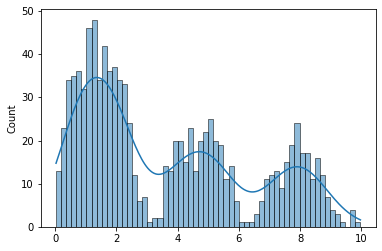

In [3]:
custom_sinc = CustomDistribution(lambda x:abs(np.sin(x)/x)*np.sqrt(x), interval=(0, 10))
custom_sinc.plot(n_bins=60, n_samples=1000)